In [13]:
import os
import pandas as pd
import pdb
import time
from sklearn.preprocessing import minmax_scale

def blend(path, select_to_essemble, weights=None, minmaxscale=False, shortenname=False):
    if weights is not None:
        if type(weights) != dict:
            raise ValueError('weights must be a dict or None')
        sum_weight = sum(weights.values())
        if int(sum_weight*10000)+1 != 10000 and int(sum_weight) != 1: # sometimes sum can be 0.9999999999999999, which is 1 essentially
            raise ValueError('sum of weights must be 1, but you have: {}'.format(sum_weight))
        if len(select_to_essemble) != len(weights):
            raise ValueError('when weight is not None, it must have length of select_to_essemble')
    xgb_topn_repo = {}   
    cnt = 0
    for filename in os.listdir(path):
#         pdb.set_trace()
        #score += float(item.split('_')[-1])
        select = None
        if len(select_to_essemble) == 0: # if selecting any specific ones to essemble, then essemble all 
            select = filename
        else:
            if filename in select_to_essemble:
                select = filename
            else:
                continue
        print('selected: ' + select)
        tmp = pd.read_csv(path+select)
        if shortenname:
            if select.split('.')[-1] == 'gz':
                shortened_name = select.split('.')[-3].split('_')[-1]
            else:
                shortened_name = select.split('.')[-2].split('_')[-1]
            xgb_topn_repo[shortened_name] = tmp.copy()
        else:
            xgb_topn_repo[select] = tmp.copy()
#         import pdb
#         pdb.set_trace()
        if cnt == 0:
            label_cols = list(tmp.columns)
            label_cols.pop(0) # remove 'id'
        if minmaxscale:
            tmp[label_cols] = minmax_scale(tmp[label_cols].values)  
        if weights is not None:
            tmp[label_cols] = tmp[label_cols].applymap(lambda x: x*weights[select])
        if cnt == 0:
            preds = tmp
        else:
            preds[label_cols] += tmp[label_cols]  
        cnt += 1

    print(str(cnt)+' results selected')
    if weights is None:
        preds[label_cols] = preds[label_cols].applymap(lambda x: x/cnt)
    return preds, label_cols, xgb_topn_repo, cnt

In [2]:
# 9873_MAD131330181808_ensemble_1520437955_1520005508_1520572538_1520444908_1520438638_1520460207_6_1520573203.csv.gz
# 9860_xgb_ensemble_1520432483_1520431835_1518834132_3_1520437955.csv.gz',
# 9857_xgb_ensemble_5_1520005508.csv.gz',
# 9856_lev_ensemble_1520569282_1520559231_1520560403_1520558417_4_1520572538.csv.gz
# 9842_rnn_w_conv_840B_300d_ep4_1520444908.csv',
# 9842_ModelName.RNN__ep6_fasttext_datagen_200_300_1520438638.csv',
# 9832_rnn_w_conv_twitter_1520460207.csv']


# 9873_MAD151524181810_ensemble_1520437955_1520005508_1520560823_1520444908_1520438638_1520460207_6_1520562334.csv.gz
# 9860_xgb_ensemble_1520432483_1520431835_1518834132_3_1520437955.csv.gz',
# 9857_xgb_ensemble_5_1520005508.csv.gz',
# 9853_lev_ensemble_1520559231_1520560403_1520558417_3_1520560823.csv.gz',
# 9842_rnn_w_conv_840B_300d_ep4_1520444908.csv',
# 9842_ModelName.RNN__ep6_fasttext_datagen_200_300_1520438638.csv',
# 9832_rnn_w_conv_twitter_1520460207.csv']


# 9872_PureRNN_w_layer2Logreg25_30_165_165_12_1520888020_1520572538_1520444908_1520438638_1520460207__5_1520963719.csv.gz
# '9854_ModelName.LOGREG_layer2_1520888020.csv',
# '9856_lev_ensemble_1520569282_1520559231_1520560403_1520558417_4_1520572538.csv.gz',
# '9842_rnn_w_conv_840B_300d_ep4_1520444908.csv',
# '9842_ModelName.RNN__ep6_fasttext_datagen_200_300_1520438638.csv',
# '9832_rnn_w_conv_twitter_1520460207.csv'



# 9856_lev_ensemble_1520569282_1520559231_1520560403_1520558417_4_1520572538.csv.gz
# 9845_rnn_w_conv_lev_d300_b512_ep8_1520569282.csv
# 9851_rnn_w_conv_lev_d300_ep6_1520559231.csv
# 9846_rnn_w_conv_lev_d300_ep8_1520560403.csv
# 9846_rnn_w_conv_lev_d300_ep5_1520558417.csv


# 9853_lev_ensemble_1520559231_1520560403_1520558417_3_1520560823.csv.gz
# 9851_rnn_w_conv_lev_d300_ep6_1520559231.csv
# 9846_rnn_w_conv_lev_d300_ep8_1520560403.csv
# 9846_rnn_w_conv_lev_d300_ep5_1520558417.csv


# 9869_xgb_meta_ensemble_1520435392_1520460999__2_1520461403.csv.gz
# 1. 9860_meta_ensemble_1520434451_1520005508_2_1520435392.csv.gz
# 2. 9865_xgb_ensemble_1520460207_1520444908_1520438638_3_1520460999.csv.gz


# 9868_xgb_meta_ensemble_1520435392_1520435392_2_1520446721.csv.gz
# 1. 9860_meta_ensemble_1520434451_1520005508_2_1520435392.csv.gz
# 2. 9863_xgb_ensemble_two_rnn_9842_15204449085_1520438638_2_1520446259.csv.gz


# 9865_xgb_ensemble_1520460207_1520444908_1520438638_3_1520460999.csv.gz
# 1. 9842_rnn_w_conv_840B_300d_ep4_1520444908.csv
# 2. 9842_ModelName.RNN__ep6_fasttext_datagen_200_300_1520438638.csv
# 3. 9832_rnn_w_conv_twitter_1520460207.csv


# 9863_xgb_ensemble_two_rnn_9842_15204449085_1520438638_2_1520446259.csv.gz
# 1. 9842_rnn_w_conv_840B_300d_ep4_1520444908.csv
# 2. 9842_ModelName.RNN__ep6_fasttext_datagen_200_300_1520438638.csv

# 9862_Normal_avg_0437955_0005508_1041358_0888020_4_1081874.csv.gz
#     '9860_xgb_ensemble_1520432483_1520431835_1518834132_3_1520437955.csv.gz',
#     '9857_xgb_ensemble_5_1520005508.csv.gz',
#     '9841_layer3_lgb_9layer2_1521041358.csv',
#     '9854_ModelName.LOGREG_layer2_1520888020.csv'

# 9862_xgb_meta_ensemble_1520437955_1520005508_2_1520438218.csv.gz
# 1. 9860_xgb_ensemble_1520432483_1520431835_1518834132_3_1520437955.csv.gz
# 2. 9857_xgb_ensemble_5_1520005508.csv.gz


# 9860_xgb_ensemble_1520432483_1520431835_1518834132_3_1520437955.csv.gz
# 1. 9840_ModelName.RNN__ep4_fasttext_datagen_200_300_1520432483.csv
# 2. 9836_noscaled_xgb_top8__0.98852106_1520431835.csv
# 3. 9839_sub_FastText_cleaned_200_300_50_50_0.1_32_6_1518834132.csv


# 9860_meta_ensemble_1520434451_1520005508_2_1520435392.csv.gz 
# 1. 9857_xgbstack1520431835_noscaleposweight_rnn_ep4_ensemble_2_1520434451.csv.gz
# 2. 9857_xgb_ensemble_5_1520005508.csv.gz


# 9857_xgbstack1520431835_noscaleposweight_rnn_ep4_ensemble_2_1520434451.csv.gz: 
# 1. 9840_ModelName.RNN__ep4_fasttext_datagen_200_300_1520432483.csv
# 2. 9836_noscaled_xgb_top8__0.98852106_1520431835.csv

In [91]:
orderedbyvalauc = ['1520797688.csv',
 '1520767775.csv',
 '1520780865.csv',
 '1520794054.csv',
 '1520807249.csv',
 '1520804323.csv',
 '1520774313.csv',
 '1520800674.csv',
 '1520810437.csv',
 '1520786749.csv',
 '1520783794.csv',
 '1520790392.csv',
 '1520777247.csv',
 '1520770656.csv',
 '1520869857.csv',
 '1520867031.csv',
 '1520879061.csv',
 '1520873235.csv',
 '1520881879.csv',
 '1520875718.csv',
 '1520863673.csv']

In [92]:
firstnbyvalauc = orderedbyvalauc[:8]

In [68]:
label_cols

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [71]:
1 == 1 == 1 == \
1 == 1 == \
1

True

In [72]:
tempdict = {'a':0}

tempdict.get('b')

In [ ]:
tempdict[]

In [67]:
import pickle
def save_obj(obj, name ):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

import copy
class BaseLayerResultsRepo:
    def __init__(self, label_cols=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'], load_from_file=True):
        self._layer1_oof_train = {}
        self._layer1_oof_mean_test = {}
        self._layer1_oof_perfold_test = {}
        self._layer1_oof_nofold_test = {}
        for label in label_cols:
            self._layer1_oof_train[label] = []
            self._layer1_oof_mean_test[label] = []
            self._layer1_oof_perfold_test[label] = []
            self._layer1_oof_nofold_test[label] = []
        self._base_layer_est_preds = {}
        self._model_data_id_list = []
        self._base_layer_est_scores = {}
        self._label_cols = label_cols
        self._save_lock = False # will be set to True if remove() is invoked successfully
        if load_from_file:
            print('load from file')
            self._layer1_oof_train = load_obj('models_layer1_oof_train')
            self._layer1_oof_mean_test = load_obj('models_layer1_oof_mean_test')
            self._layer1_oof_perfold_test = load_obj('models_layer1_oof_perfold_test')
            self._layer1_oof_nofold_test = load_obj('models_layer1_oof_nofold_test')
            self._base_layer_est_preds = load_obj('models_base_layer_est_preds')
            self._model_data_id_list = load_obj('models_model_data_id_list')
            self._base_layer_est_scores = load_obj('models_base_layer_est_scores')

    def get_model_data_id_list(self):
        return self._model_data_id_list

    def add(self, layer1_oof_train, layer1_oof_mean_test, layer1_oof_perfold_test, layer1_oof_nofold_test, base_layer_est_preds, model_data_id_list):
        assert type(layer1_oof_train) == dict
        assert len(list(layer1_oof_train)) == len(self._label_cols)
        assert set(list(layer1_oof_train)) - set(self._label_cols) == set()
        
        assert type(layer1_oof_mean_test) == dict
        assert len(list(layer1_oof_mean_test)) == len(self._label_cols) # both lengths should be 6 (in toxic competition)
        assert set(list(layer1_oof_mean_test)) - set(self._label_cols) == set() # both should contains same labels
                # (in toxic competition: ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])
        
        assert type(layer1_oof_perfold_test) == dict
        assert len(list(layer1_oof_perfold_test)) == len(self._label_cols)
        assert set(list(layer1_oof_perfold_test)) - set(self._label_cols) == set()
        
        assert type(layer1_oof_nofold_test) == dict
        assert len(list(layer1_oof_nofold_test)) == len(self._label_cols)
        assert set(list(layer1_oof_nofold_test)) - set(self._label_cols) == set()
        
        for label in self._label_cols:
            len(layer1_oof_train[label]) == len(layer1_oof_mean_test[label]) == len(layer1_oof_perfold_test[label]) == \
            len(layer1_oof_nofold_test[label]) == len(list(base_layer_est_preds))
        assert type(base_layer_est_preds) == dict
        assert type(model_data_id_list) == list
        assert set(list(base_layer_est_preds)) - set(model_data_id_list) == set()
        for model_data_id in model_data_id_list:
            if model_data_id in set(self._model_data_id_list):
                raise ValueError('{} is already in the repo'.format(model_data_id))
        for model_data_id in model_data_id_list:
            if model_data_id not in set(self._model_data_id_list):
                self._model_data_id_list.append(model_data_id)
                self._base_layer_est_scores[model_data_id] = 0
        for (key, values) in base_layer_est_preds.items():
            self._base_layer_est_preds[key] = values
        for label in self._label_cols:
            self._layer1_oof_train[label] += layer1_oof_train[label]
            self._layer1_oof_mean_test[label] += layer1_oof_mean_test[label]
            self._layer1_oof_perfold_test[label] += layer1_oof_perfold_test[label]
            self._layer1_oof_nofold_test[label] += layer1_oof_nofold_test[label]

    def add_score(self, model_data_id, score):
        assert score <= 1 and score >= 0
        if model_data_id not in set(self._model_data_id_list):
            raise ValueError('{} not in the repo. please add it first'.format(model_data_id))
        if model_data_id in set(self._model_data_id_list):
            print('{} already existed in the repo. score: {} update to {}'\
                  .format(model_data_id, self._base_layer_est_scores[model_data_id], score))
        self._base_layer_est_scores[model_data_id] = score

    def show_scores(self):
        """
        Returns:
            list of (name, score) tuple in sorted order by score
        """
        sorted_list_from_dict = sorted(self._base_layer_est_scores.items(), key=lambda x:x[1], reverse=True)
        for key, value in sorted_list_from_dict:
            print('{}\t{}'.format(value, key))
        return sorted_list_from_dict

    def get_results(self, threshold=None, chosen_ones=None):
        """
        Params:
            Note: threshold and chosen_ones can NOT both be not-None
            threshold: if not None, then return only ones that score >= threshold
            chosen_ones: list of model_data_id
        Returns:
            layer1_oof_train, layer1_oof_mean_test, base_layer_est_preds
        """
        if threshold != None and chosen_ones != None:
            raise ValueError('threshold and chosen_ones can NOT both be not-None')
        if threshold == None and chosen_ones == None:
            return self._layer1_oof_train, self._layer1_oof_mean_test, self._base_layer_est_preds
        else:
            layer1_oof_train_temp = copy.deepcopy(self._layer1_oof_train) # copy only keep the keys, not the value reference
            layer1_oof_mean_test_temp = copy.deepcopy(self._layer1_oof_mean_test)   # deepcopy also keep the value reference
            base_layer_est_preds_temp = self._base_layer_est_preds.copy()
            base_layer_est_scores_temp = self._base_layer_est_scores.copy()
            model_data_id_list_temp = self._model_data_id_list.copy()
            if threshold != None:
                assert threshold <= 1 and threshold >= 0
                for (key, value) in base_layer_est_scores_temp.items():
                    if value < threshold:
                        self.remove(key)
            else: # chosen_ones != None
                assert type(chosen_ones) == list
                for model_data_id in model_data_id_list_temp:
                    if model_data_id not in chosen_ones:
                        self.remove(model_data_id)

            self._save_lock = False # not actually removed, so set it back to True

            r1, r2, r3 = self._layer1_oof_train, self._layer1_oof_mean_test, self._base_layer_est_preds

            self._layer1_oof_train = layer1_oof_train_temp
            self._layer1_oof_mean_test = layer1_oof_mean_test_temp
            self._base_layer_est_preds = base_layer_est_preds_temp
            self._base_layer_est_scores = base_layer_est_scores_temp
            self._model_data_id_list = model_data_id_list_temp
            return r1, r2, r3

    def remove(self, model_data_id):
        #import pdb
        #pdb.set_trace()
        mdid_index = self._model_data_id_list.index(model_data_id)
        self._model_data_id_list.pop(mdid_index)
        self._base_layer_est_preds.pop(model_data_id)
        self._base_layer_est_scores.pop(model_data_id)
        for label in self._label_cols:
            self._layer1_oof_train[label].pop(mdid_index)
            self._layer1_oof_mean_test[label].pop(mdid_index)
        self._save_lock = True

    def unlock_save(self):
        self._save_lock = False

    def save(self):
        if self._save_lock:
            print('save function is locked due to some results removed from the repo. \
            Call unlock_save() to unlock the save function and save again.')
        else:
            save_obj(self._model_data_id_list, 'models_model_data_id_list')
            save_obj(self._layer1_oof_train, 'models_layer1_oof_train')
            save_obj(self._layer1_oof_mean_test, 'models_layer1_oof_mean_test')
            save_obj(self._base_layer_est_preds, 'models_base_layer_est_preds')
            save_obj(self._base_layer_est_scores, 'models_base_layer_est_scores')


In [102]:
gridsearchtopn = grid_search_blend('lb', 12)
print(gridsearchtopn)

['98391520733899.csv', '98381520744730.csv', '98361520730237.csv', '98351520869857.csv', '98351520863673.csv', '98341520747325.csv', '98311520873235.csv', '98301520881879.csv', '98301520797688.csv', '98271520737458.csv', '98261520767775.csv', '98241520780865.csv']


In [103]:
preds, label_cols, xgb_topn_repo, cnt = blend(path, gridsearchtopn)

selected: 98351520869857.csv
selected: 98301520881879.csv
selected: 98361520730237.csv
selected: 98341520747325.csv
selected: 98351520863673.csv
selected: 98381520744730.csv
selected: 98261520767775.csv
selected: 98271520737458.csv
selected: 98301520797688.csv
selected: 98311520873235.csv
selected: 98391520733899.csv
selected: 98241520780865.csv
12 results selected


In [65]:
path = 'StackPreds/TopN_XGB/'
   
#select_to_essemble = [] # this will affect the scatter plotting later
#select_to_essemble = #['9836_noscaled_xgb_top8__0.98852106_1520431835.csv',
select_to_essemble = [
#     '9860_xgb_ensemble_1520432483_1520431835_1518834132_3_1520437955.csv.gz',
#     '9857_xgb_ensemble_5_1520005508.csv.gz',
    '9841_layer3_lgb_9layer2_1521041358.csv',
    '9836_noscaled_xgb_top8__0.98852106_1520431835.csv'
#     '9854_ModelName.LOGREG_layer2_1520888020.csv'
#     '9862_Normal_avg_0437955_0005508_1041358_0888020_4_1081874.csv.gz',
#     '9870_RNN_CapNwei_85_15_1080470_0958260_2_1081126.csv.gz'
    
#     '9857_2Cap_w_wei_35_50_15_1055020_1079472_final_3_1080470.csv.gz',
#                         '9843_Cap_45_55_1055020_0958260_2_1079660.csv.gz',
#                         '9837_submission_capule_epoch_6_1055020.csv',
#                         '9842_submission_batch1024_capule_roc990_valloss_0422_1079472.csv',
#                         '9841_layer3_lgb_9layer2_1521041358.csv',
#                         '9851_ModelName.LOGREG_layer2_GoodHalfOfXGB_1520967980.csv',
#                         '9831_submit_ave_final.csv',
#                         '9853_ModelName.XGB_layer2_UsingBadHalf7_1520888019.csv',
#                         '9855_GridSearchTop8_8_0991846.csv.gz',
#                         '9860_xgb_ensemble_1520432483_1520431835_1518834132_3_1520437955.csv.gz'
#     '9869_PureRNN40222216_1520572538_1520444908_1520438638_1520460207_4_1520958260.csv.gz'
#                         '9850_ModelName.XGB_layer2_UsingAll14_1520886903.csv',
#                         '9854_ModelName.XGB_layer2_UsingGoodHalf7_1520885607.csv',
#                         '9860_xgb_ensemble_1520432483_1520431835_1518834132_3_1520437955.csv.gz',
#                         '9857_xgb_ensemble_5_1520005508.csv.gz',
#                         '9856_lev_ensemble_1520569282_1520559231_1520560403_1520558417_4_1520572538.csv.gz',
#                         '9842_rnn_w_conv_840B_300d_ep4_1520444908.csv',
#                         '9842_ModelName.RNN__ep6_fasttext_datagen_200_300_1520438638.csv',
#                         '9832_rnn_w_conv_twitter_1520460207.csv'
]


weights = {
    '9862_Normal_avg_0437955_0005508_1041358_0888020_4_1081874.csv.gz':0.5,
    '9870_RNN_CapNwei_85_15_1080470_0958260_2_1081126.csv.gz':0.5
#     '9857_2Cap_w_wei_35_50_15_1055020_1079472_final_3_1080470.csv.gz':0.15,
#     '9843_Cap_45_55_1055020_0958260_2_1079660.csv.gz':0.15,
#     '9837_submission_capule_epoch_6_1055020.csv':0.35,
#     '9842_submission_batch1024_capule_roc990_valloss_0422_1079472.csv':0.50,
#     '9831_submit_ave_final.csv':0.15
# #     '9853_ModelName.XGB_layer2_UsingBadHalf7_1520888019.csv':0.125,
#     '9855_GridSearchTop8_8_0991846.csv.gz':0.42,
#     '9869_PureRNN40222216_1520572538_1520444908_1520438638_1520460207_4_1520958260.csv.gz':0.85
#     '9854_ModelName.LOGREG_layer2_1520888020.csv':0.25,
# #     '9850_ModelName.XGB_layer2_UsingAll14_1520886903.csv':0.06,
# #     '9854_ModelName.XGB_layer2_UsingGoodHalf7_1520885607.csv':0.06,
# #     '9860_xgb_ensemble_1520432483_1520431835_1518834132_3_1520437955.csv.gz':0.091,
# #     '9857_xgb_ensemble_5_1520005508.csv.gz':0.091,
#     '9856_lev_ensemble_1520569282_1520559231_1520560403_1520558417_4_1520572538.csv.gz':0.3,#0.24,
#     '9842_rnn_w_conv_840B_300d_ep4_1520444908.csv':0.165,
#     '9842_ModelName.RNN__ep6_fasttext_datagen_200_300_1520438638.csv':0.165,
#     '9832_rnn_w_conv_twitter_1520460207.csv':0.12,
}

# ['9845_rnn_w_conv_lev_d300_b512_ep8_1520569282.csv', 
#                       '9851_rnn_w_conv_lev_d300_ep6_1520559231.csv', 
#                       '9846_rnn_w_conv_lev_d300_ep8_1520560403.csv',
#                       '9846_rnn_w_conv_lev_d300_ep5_1520558417.csv',
#                       '9842_rnn_w_conv_840B_300d_ep4_1520444908.csv',
#                       '9842_ModelName.RNN__ep6_fasttext_datagen_200_300_1520438638.csv',
#                       '9832_rnn_w_conv_twitter_1520460207.csv'] + gridsearchtopn

# ['9860_xgb_ensemble_1520432483_1520431835_1518834132_3_1520437955.csv.gz',
#                       '9857_xgb_ensemble_5_1520005508.csv.gz',
#                       '9856_lev_ensemble_1520569282_1520559231_1520560403_1520558417_4_1520572538.csv.gz',  
#                       #'9853_lev_ensemble_1520559231_1520560403_1520558417_3_1520560823.csv.gz',
#                       '9842_rnn_w_conv_840B_300d_ep4_1520444908.csv',
#                      '9842_ModelName.RNN__ep6_fasttext_datagen_200_300_1520438638.csv',
#                      '9832_rnn_w_conv_twitter_1520460207.csv']

# weights = {
#     '9860_xgb_ensemble_1520432483_1520431835_1518834132_3_1520437955.csv.gz':0.13,
#     '9857_xgb_ensemble_5_1520005508.csv.gz':0.13,
#     '9856_lev_ensemble_1520569282_1520559231_1520560403_1520558417_4_1520572538.csv.gz':0.3,#0.24,
#     '9842_rnn_w_conv_840B_300d_ep4_1520444908.csv':0.18,
#     '9842_ModelName.RNN__ep6_fasttext_datagen_200_300_1520438638.csv':0.18,
#     '9832_rnn_w_conv_twitter_1520460207.csv':0.08,
# }

preds, label_cols, xgb_topn_repo, cnt = blend(path, select_to_essemble, shortenname=True)
#preds, label_cols, xgb_topn_repo, cnt = blend(path, select_to_essemble, weights, shortenname=True)
#preds, label_cols, xgb_topn_repo, cnt = blend(path, select_to_essemble, weights, minmaxscale=True, shortenname=True)

selected: 9841_layer3_lgb_9layer2_1521041358.csv
selected: 9836_noscaled_xgb_top8__0.98852106_1520431835.csv
2 results selected


In [51]:
import matplotlib.pyplot as plt

In [52]:
label_cols

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [53]:
preds.head(3)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,1.062890,0.387061,1.044807,0.130520,0.968301,0.527900
1,0000247867823ef7,0.001309,0.000225,0.000423,0.000992,0.000633,0.000512
2,00013b17ad220c46,0.002534,0.000396,0.000923,0.001066,0.001007,0.000683


In [54]:
list(xgb_topn_repo)

['1081126', '1081874']

In [55]:
from toxic_utils import scatter_per_label
%matplotlib inline

toxic
severe_toxic
obscene
threat
insult
identity_hate
['1521041358', '1520431835']


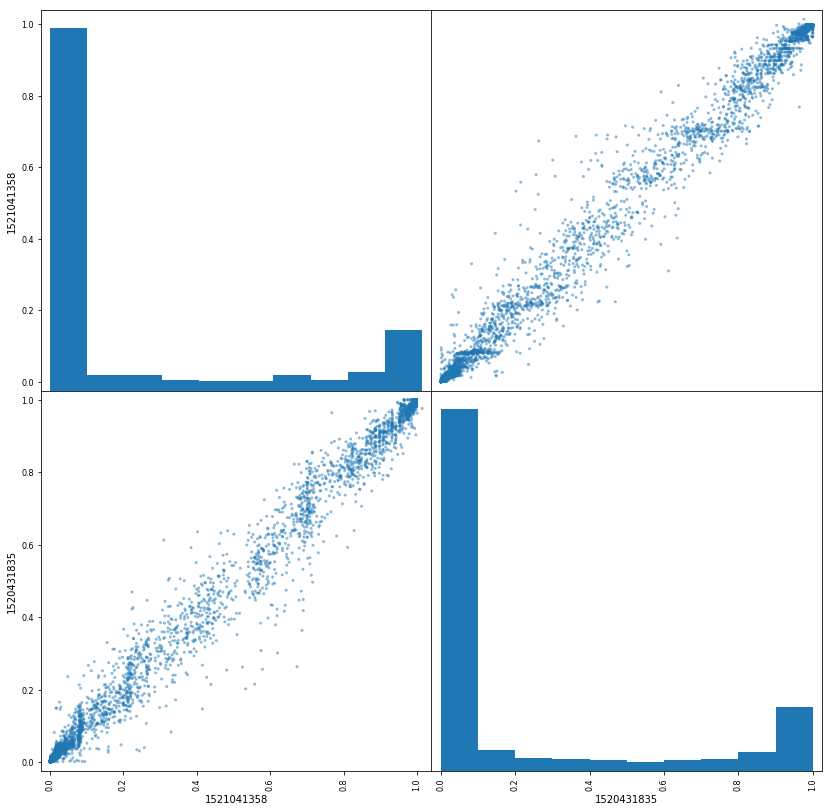

In [66]:
scatter_per_label(xgb_topn_repo, 'toxic', 8000)

In [144]:
list(xgb_topn_repo)

['1520572538',
 '1520444908',
 '1520460207',
 '1520005508',
 '1520437955',
 '1520438638']

In [57]:
tempid = ''
for selected in select_to_essemble:
    temp = selected.split('_')[-1].split('.')[0]
    if len(temp) > 7:
        temp = temp[3:]
    print(temp)
    tempid += temp + '_'
print(tempid)

1081874
1081126
1081874_1081126_


In [64]:
essemble_name = 'RNN_Normal_50_50_1081874_1081126' # ftc6: fasttext crawl epoch6
tempid = str(int(time.time()))[3:]
print(tempid) 
preds.to_csv(path+essemble_name+'_{}_{}.csv.gz'.format(cnt, tempid), index=False, compression='gzip')

1082929


In [12]:
tempid = str(int(time.time()))[3:]
print(tempid)

1079472
